In [ ]:
# Supervised Text Classification Challenge
The goal is to improve the category classification performance for a set of text posts. The evaluation metric is the **macro F1 score**. A baseline method based on scikit-learn TfidfVectorizer and LogisticRegression was provided. The baseline score is about **0.3237**. 

The macro F1 score is given by the average of the F1 scores for each category (label), computed independently from their size. Therefore, it may not be the best metric to characterize the performance of a classifier in case of unbalanced class sizes. 

I explored various features, classifiers and hyperparameter settings. The final classifier is a majority vote ensemble of 2 logistic regression classifiers (on different set of features) and 1 gradient boosted tree classifier (of the XGBoost library) classifier leading to a final macro F1 score equal to **0.5574** ) Those are the main takeaways: 
1. Overall, logistic regression outperformed the other classifiers I tried (e.g. gradient boosted trees and random forest).
2. Gradient tree boosting of the XGBoost library was the 2nd best classifier after logistic regression.
3. Performing stemming (with preliminary stop word removal) improved the performance of logistic regression and XGBoost.
4. The addition of topic features via Latent Dirichlet Allocation improved slightly the performance for two of the classifiers.
5. The manually engineered features that gave a slight improvement to one of the classifiers are the length of a post (by number of tokens) and the question mark ('?') count.

The outcome (1) is not surprising, because the number of training samples (~ 14,000) is relatively low with respect to the number of features (e.g. ~ 10,000 extracted via scikit-learn TfidfVectorizer) for tree based methods to be fully effective. In this case a simple linear classifier is expected to do better than non-linear classifiers. I would expect tree based methods to outperform logistic regression if *number of samples* $\gg$ *number of features*. See for example the discussion on (http://fastml.com/classifying-text-with-bag-of-words-a-tutorial/).


### The Dataset
The dataset consist in 74097 text posts for training and 31756 for testing. There are 2 topic categories:tweet, username. The topic sizes are quite unbalanced. The proportions of categories in training and test sets seem to match.

The deatils about features, classifiers and hyperparameters are given in the remaining of this notebook.


In [4]:
import pandas as pd
from csv import DictReader
from time import time
from numpy import mean, std
from collections import Counter
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline, FeatureUnion, Pipeline
from sklearn.metrics import f1_score, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import cross_val_score
from nltk import stem
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

from wordcloud import WordCloud, STOPWORDS
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

IN_FOLDER = 'categories/data/' # folder for train and test.csv files

c:\users\ciaran\appdata\local\programs\python\python35\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [48]:

file = open('data.csv', mode='r', encoding='utf-8', errors='ignore')
training_data = pd.read_csv(file)

radicals = training_data[training_data.radical==1]
nonradicals = training_data[training_data.radical==0]


In [50]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.model_selection import train_test_split

features = ['username','tweet','radical']
X = training_data[features].iloc[:,:-1]
y = training_data[features].iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

### Quick inspection of the dataset

In [6]:
'''print('Training samples:', len(targets_train))
print('Testing samples:', len(targets_test))
print('Ttraining category count:', len(set(targets_train)))
print('Testing category count:', len(set(targets_test)),'\n')
print('Training set:', Counter(targets_train).most_common(),'\n')
print('Testing set:', Counter(targets_test).most_common())
'''
print('Training samples:', len(X_train))
print('Testing samples:', len(X_test))
print('Ttraining category count:', len(set(X_train)))
print('Testing category count:', len(set(X_test)),'\n')
print('Training set:', Counter(X_train).most_common(),'\n')
print('Testing set:', Counter(X_test).most_common())

Training samples: 74097
Testing samples: 31756
Ttraining category count: 2
Testing category count: 2 

Training set: [('tweet', 1), ('username', 1)] 

Testing set: [('tweet', 1), ('username', 1)]


In [42]:
import csv
import re


bannedWord = ['RT','https','co','amp','&','@','tRT','thttps','new','will','say','today','say','day','tThe']
re_banned_words = re.compile(r"\b(" + "|".join(bannedWord) + ")\\W", re.I)

def RemoveBannedWords(toPrint):
    global re_banned_words
    return re_banned_words.sub("", toPrint)






your_list = []
radical_list = []
with open('data.csv', 'r',encoding="utf8") as f:
    reader = csv.reader(f)
    '''
    numberOflines = 88444
    next(reader, None) # skip first line
    for row in reader:
        if numberOflines > 0:
            your_list = '/t'.join([i[0] for i in reader])
            numberOflines -=1
            '''
with open('radical.csv', 'r',encoding="utf8",errors='ignore') as f:
    reader = csv.reader(f)
    numberOflinesRad = 5000
    for row in reader:
        if numberOflinesRad > 0:
            radical_list = '/t'.join([i[0] for i in reader])
            numberOflines -=1
    
radical_list = RemoveBannedWords(radical_list)


    
       

In [ ]:
## Wordclouds

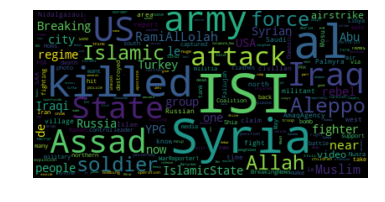

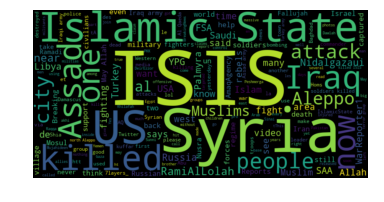

In [44]:
'''import csv
your_list = []
with open('data.csv', 'r',encoding="utf8") as f:
    reader = csv.reader(f)
    your_list = ','.join([i[0] for i in reader])
'''


# Generate a word cloud image
wordcloud = WordCloud(collocations = False,stopwords=STOPWORDS).generate(radical_list)


# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(normalize_plurals=False,width=800,height=400).generate(radical_list)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

